In [ ]:
!pip install pandas numpy scikit-learn

In [22]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
iris = load_iris()

In [24]:
X = iris.data
y = iris.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
svm_clf = SVC(kernel='linear') 
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
y_pred = svm_clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



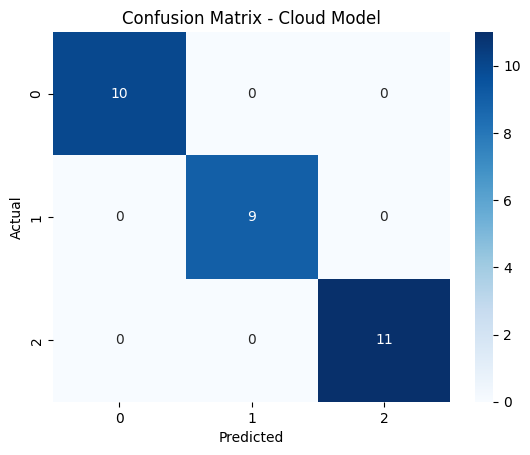

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cloud Model")
plt.show()

In [34]:
feature_names = iris.feature_names
feature_importances = np.abs(svm_clf.coef_[0])

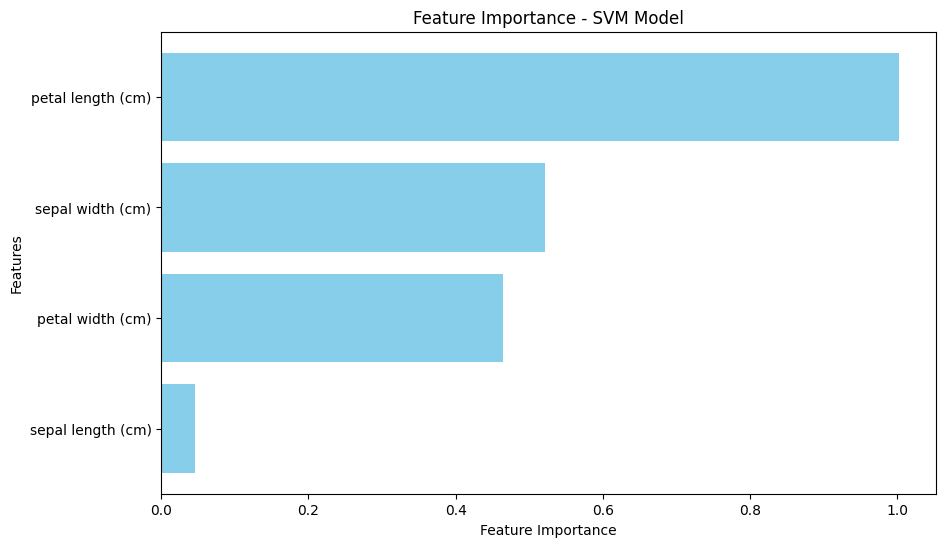

In [35]:
if feature_importances is not None:
    sorted_indices = np.argsort(feature_importances)
    sorted_features = [feature_names[i] for i in sorted_indices]
    sorted_importances = feature_importances[sorted_indices]
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance - SVM Model')
    plt.show()